# Task 1

Write a script that tries all possible configurations of an arbitrary robot, calculates the inverse dynamics excluding collisions, and saves all the results of the experiment - motor angles and torques to a .csv file.

Make a violinplot showing the distribution of torques in the different joints. x-axis - joint name, y-axis - torque.

In [190]:
import csv
import time
import mujoco
import mujoco.viewer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Mujoco model
model = mujoco.MjModel.from_xml_path('task1.xml')
spa = []
sra = []
sya = []
spt = []
srt = []
syt = []
tests_count = input()
with open('inverse_dynamics_results.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ShoulderPitch Angle', 'ShoulderRoll Angle', 'ShoulderYaw Angle', 'ElbowPitch Angle', 'ShoulderPitch Torque', 'ShoulderRoll Torque', 'ShoulderYaw Torque', 'ElbowPitch Torque'])
    for i in range(0,int(tests_count)):
        dynamics_list = []
        data = mujoco.MjData(model)
        start = time.time()

        with mujoco.viewer.launch_passive(model, data) as viewer:
            # Close the viewer automatically after 30 wall-seconds.
            print(i)
            while viewer.is_running() and time.time() - start < 10:
                step_start = time.time()
                mujoco.mj_inverse(model, data)
                dynamics_list.append(data.qfrc_inverse)
                #print(data.xquat)
                data.eq_active = 1
                data.ctrl = 1
                print(data.xfrc_applied)
                print()
                # mj_step can be replaced with code that also evaluates
                # a policy and applies a control signal before stepping the physics.
                mujoco.mj_step(model, data)
                writer.writerow([data.qpos[0],data.qpos[1], data.qpos[2], data.qvel[0], data.qvel[1], data.qvel[2]])
                # Pick up changes to the physics state, apply perturbations, update options from GUI.
                viewer.sync()

                # Rudimentary time keeping, will drift relative to wall clock.
                time_until_next_step = model.opt.timestep - (time.time() - step_start)
                if time_until_next_step > 0:
                    time.sleep(time_until_next_step)
                

# Read the torque data from the CSV file
df = pd.read_csv('inverse_dynamics_results.csv')

# Create a DataFrame with torque values for different joints
torque_data = pd.DataFrame({
    'Joint': ['ShoulderPitch', 'ShoulderRoll', 'ShoulderYaw', 'ElbowPitch'] * len(df),
    'Torque': df['ShoulderPitch Torque'].tolist() + df['ShoulderRoll Torque'].tolist() + df['ShoulderYaw Torque'].tolist() + df['ElbowPitch Torque'].tolist()
})

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Joint', y='Torque', data=torque_data)
plt.title('Distribution of Torques in Different Joints')
plt.xlabel('Joint')
plt.ylabel('Torque')
plt.show()

0
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]

# Task2

Write a linear trajectory where the robot performs a cross. The amplitude of the cross is 4 cm, the maximum velocity is 0.4 m/s. Visualize the trajectory in the simulator and collect data on the position, velocity and acceleration of the robot in joint space and cartesian space, as well as torques in the robot's motors during the trajectory. Save the collected data to a .csv file. Select the initial position of the robot yourself, so that it covers the entire desired trajectory.

Plot a trajectory. In particular, plot position, velocity, acceleration and torque against time. It is better if you format these graphs as subplots with sharex.

Record a video visualization of your trajectory using mujoco viewer.

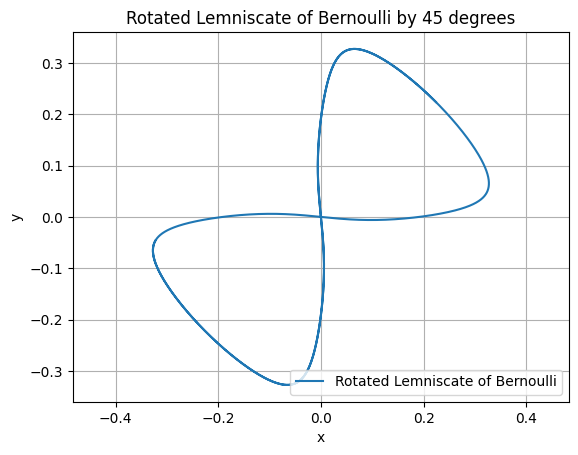

In [189]:
import time
import mujoco
import mujoco.viewer

model = mujoco.MjModel.from_xml_path('task2.xml')
data = mujoco.MjData(model)

def rotate_point(x, y, angle):
    theta = np.radians(angle)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    new_x = x * cos_theta - y * sin_theta
    new_y = x * sin_theta + y * cos_theta
    return new_x, new_y

def lemniscate_of_bernoulli_x(t, a):
    return a * np.cos(t) / (1 + np.sin(t)**2)

def lemniscate_of_bernoulli_y(t, a):
    return a * np.sin(t) * np.cos(t) / (1 + np.sin(t)**2)


def hourglass_shape_x(t, a):
    return a * np.cos(t) / (1.2 + np.sin(t)**6)

def hourglass_shape_y(t, a):
    return a * np.sin(t) * np.cos(t) / (0.8 + np.sin(t)**4)
a = 0.38
paramsX = []
paramsY = []
with mujoco.viewer.launch_passive(model, data) as viewer:
    # Close the viewer automatically after 30 wall-seconds.
    start = time.time()
    while viewer.is_running() and time.time() - start < 10:
        step_start = time.time()
        t = time.time()-start
        # mj_step can be replaced with code that also evaluates
        # a policy and applies a control signal before stepping the physics.
        mujoco.mj_step(model, data)
        x, y  = rotate_point(hourglass_shape_x((time.time()-start), a),hourglass_shape_y((time.time()-start),a), 45)
        data.qpos = [x,y,0]
        
        print()
        paramsX.append(x)
        paramsY.append(y)
        # Pick up changes to the physics state, apply perturbations, update options from GUI.
        viewer.sync()

        # Rudimentary time keeping, will drift relative to wall clock.
        time_until_next_step = model.opt.timestep - (time.time() - step_start)
        if time_until_next_step > 0:
            time.sleep(time_until_next_step)
plt.figure()
plt.plot(paramsX, paramsY, label='Rotated Lemniscate of Bernoulli')
plt.axis('equal')
plt.title('Rotated Lemniscate of Bernoulli by 45 degrees')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
